In [ ]:
import numpy as np
from collections import Counter

In [ ]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2)**2))

In [ ]:
class KNN:

    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.x_train = X
        self.y_train = y

    def predict(self, X):
      y_pred = [self._predict(x) for x in X]
      
      return np.array(y_pred)
    def _predict(self, x):
      # Compute distances between x and all examples in the training set
      distances = [euclidean_distance(x, x_train) for x_train in self.x_train]
      # Sort by distance and return indices of the first k neighbors
      k_idx = np.argsort(distances)[:self.k]
      # Extract the labels of the k nearest neighbor training samples
      k_neighbor_labels = [self.y_train[i] for i in k_idx]  
      # return the most common class label
      most_common = Counter(k_neighbor_labels).most_common(1)
      return most_common[0][0]

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
iris=datasets.load_iris()
x,y=iris.data, iris.target

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


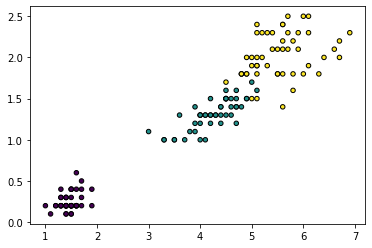

In [ ]:
plt.figure()
plt.scatter(x[:,2],x[:,3],c=y,edgecolors='k',s=20)
plt.show()

In [ ]:
model=KNN(k=5)
model.fit(x_train,y_train)

In [ ]:
predictions=model.predict(x_test)

In [ ]:
acc=np.sum(predictions==y_test)/len(y_test)

In [ ]:
acc*100

96.66666666666667